<a href="https://colab.research.google.com/github/good-thing/life_exam/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
# !wget https://raw.githubusercontent.com/good-thing/life_exam/main/LifeExpectancy1.csv

In [3]:
# 데이터 읽기
df=pd.read_csv('LifeExpectancy1_.csv')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
LifeExpectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
AdultMortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
InfantDeaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
PercentageExpenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
HepatitisB,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-fiveDeaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [5]:
# 이상치 찾기(나라당 디폴트값이 16개인지 확인, 그 이하는 이상치 취급)
df['Country'].value_counts().loc[lambda x:x<15]

Tuvalu                   1
Cook Islands             1
Marshall Islands         1
Monaco                   1
Palau                    1
Niue                     1
San Marino               1
Nauru                    1
Saint Kitts and Nevis    1
Dominica                 1
Name: Country, dtype: int64

In [6]:
co = ['Tuvalu', 'Cook Islands', 'Marshall Islands', 'Marshall Islands', 'Monaco', 'Palau', 
      'Niue', 'San Marino', 'Nauru', 'Saint Kitts and Nevis', 'Dominica']

In [7]:
# 이상치로 분류된 국가 제거
for c in co:
    df = df.drop(df[df['Country']==c].index)

In [8]:
# 제거확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2928 non-null   object 
 1   Year                          2928 non-null   int64  
 2   Status                        2928 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2928 non-null   int64  
 6   Alcohol                       2735 non-null   float64
 7   PercentageExpenditure         2928 non-null   float64
 8   HepatitisB                    2375 non-null   float64
 9   Measles                       2928 non-null   int64  
 10  BMI                           2896 non-null   float64
 11  Under-fiveDeaths              2928 non-null   int64  
 12  Polio                         2909 non-null   float64
 13  Tot

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2928.0,2.007500e+03,4.610560e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
LifeExpectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
AdultMortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
InfantDeaths,2928.0,3.040745e+01,1.181144e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2735.0,4.614856e+00,4.050749e+00,0.01000,0.905000,3.770000e+00,7.715000e+00,1.787000e+01
PercentageExpenditure,2928.0,7.403212e+02,1.990931e+03,0.00000,4.853964,6.561145e+01,4.426143e+02,1.947991e+04
HepatitisB,2375.0,8.096084e+01,2.501834e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2928.0,2.427856e+03,1.148597e+04,0.00000,0.000000,1.700000e+01,3.622500e+02,2.121830e+05
BMI,2896.0,3.823539e+01,1.995959e+01,1.00000,19.300000,4.335000e+01,5.610000e+01,7.760000e+01
Under-fiveDeaths,2928.0,4.217930e+01,1.607005e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


<Axes: >

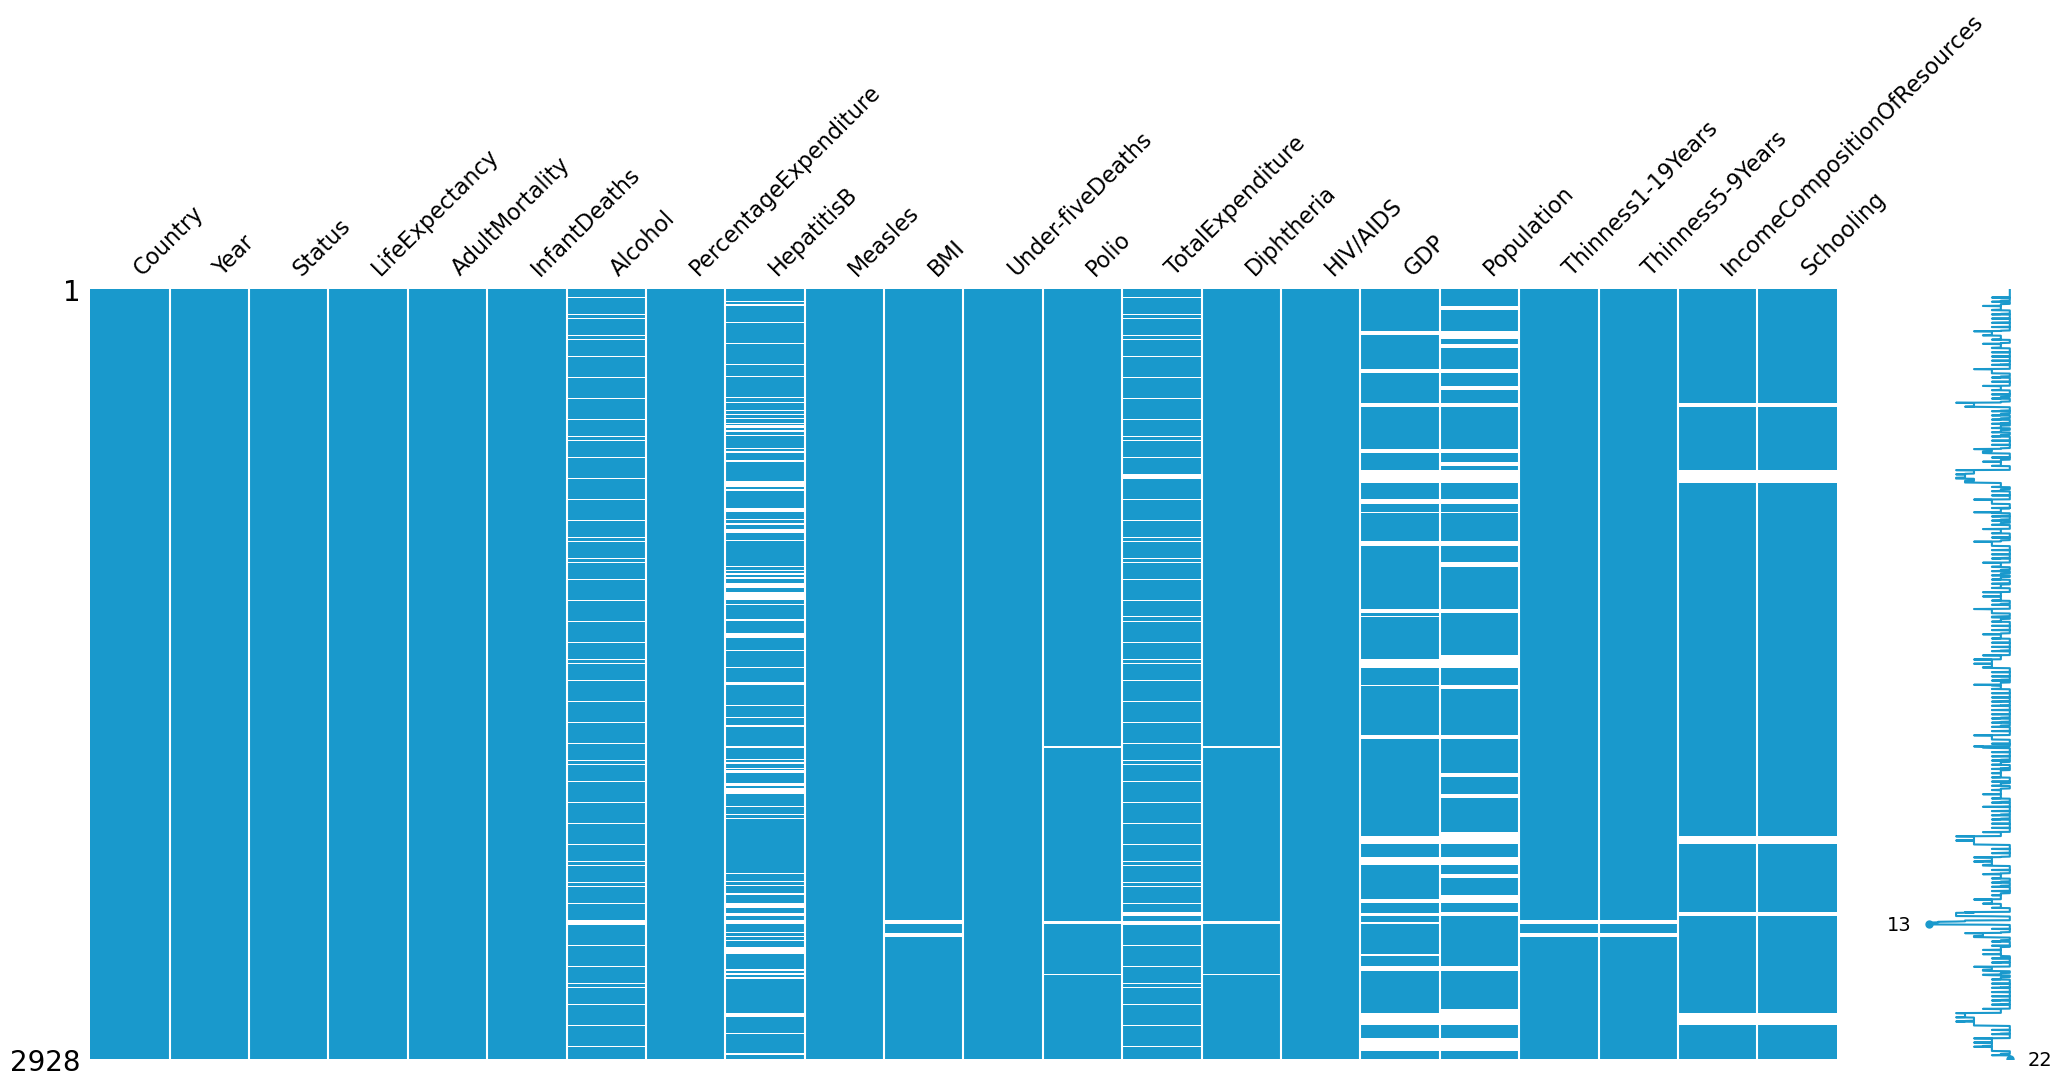

In [10]:
# 결측치 시각화(흰색 부분이 결측치임)
import missingno as msno
msno.matrix(df, color=(0.1, 0.6, 0.8))

<Axes: >

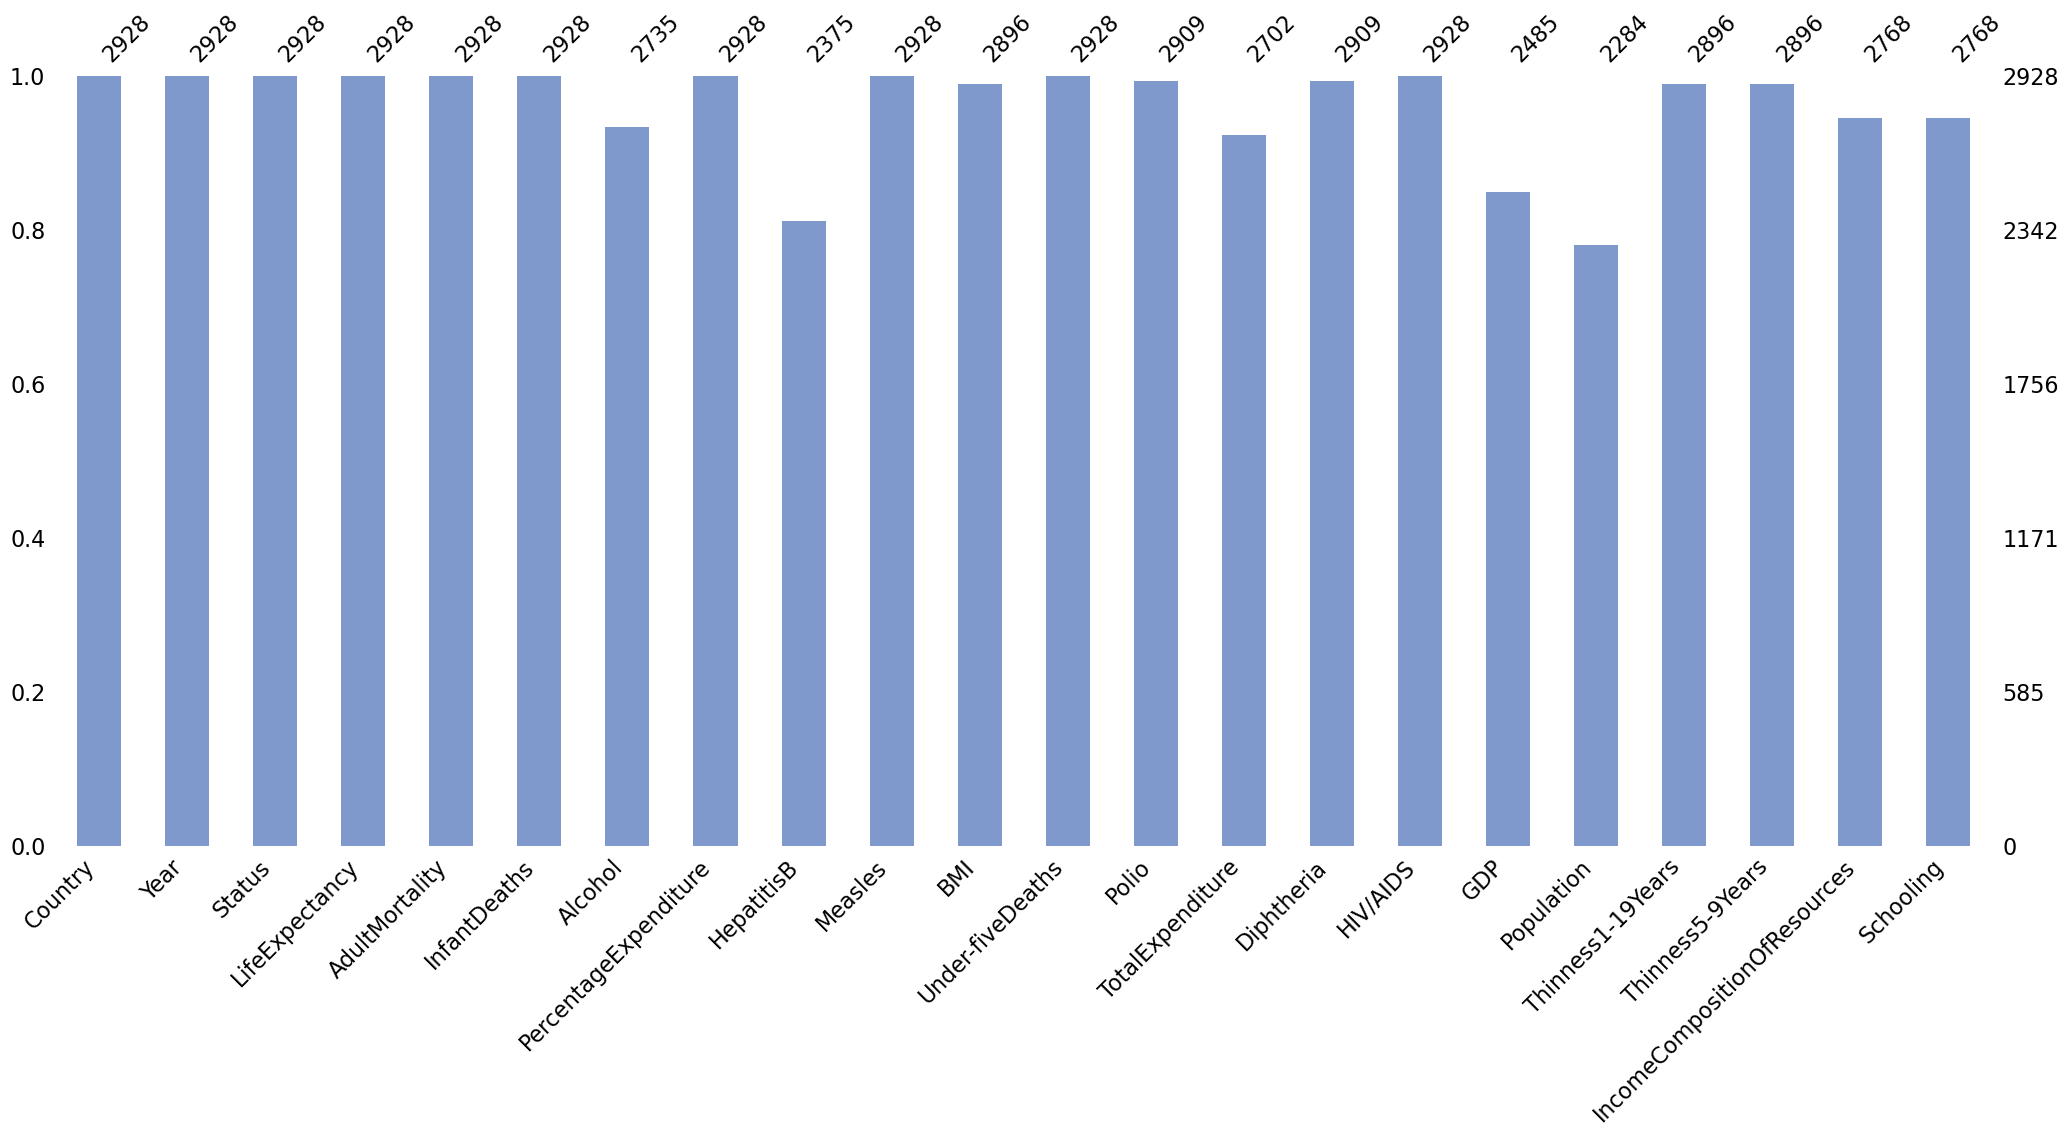

In [11]:
# 결측치 갯수 수치화
msno.bar(df, color=(0.5, 0.6, 0.8))

In [12]:
# 결측치 갯수 확인
df.isna().sum(axis=0)        #  중앙값이랑 평균치로 결측값 대체 하기로 함

Country                           0
Year                              0
Status                            0
LifeExpectancy                    0
AdultMortality                    0
InfantDeaths                      0
Alcohol                         193
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              32
Under-fiveDeaths                  0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             443
Population                      644
Thinness1-19Years                32
Thinness5-9Years                 32
IncomeCompositionOfResources    160
Schooling                       160
dtype: int64

In [13]:
# 전체 컬럼확인
df.columns        

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under-fiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness1-19Years',
       'Thinness5-9Years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [14]:
# 중앙값으로 대체할 컬럼
cols=['AdultMortality','PercentageExpenditure','HepatitisB','Polio','Diphtheria','GDP',
      'Population','Thinness1-19Years','Thinness5-9Years']

In [15]:
# 중앙값 대체
for col in cols:
    median_value=df[col].median()
    df[col]=df[col].fillna(median_value)

In [16]:
#남은 나머지 결측값 평균값으로 대체
df=df.fillna(df.mean())          

/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_3180/1409801755.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2928 non-null   object 
 1   Year                          2928 non-null   int64  
 2   Status                        2928 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2928 non-null   int64  
 6   Alcohol                       2928 non-null   float64
 7   PercentageExpenditure         2928 non-null   float64
 8   HepatitisB                    2928 non-null   float64
 9   Measles                       2928 non-null   int64  
 10  BMI                           2928 non-null   float64
 11  Under-fiveDeaths              2928 non-null   int64  
 12  Polio                         2928 non-null   float64
 13  Tot

<Axes: >

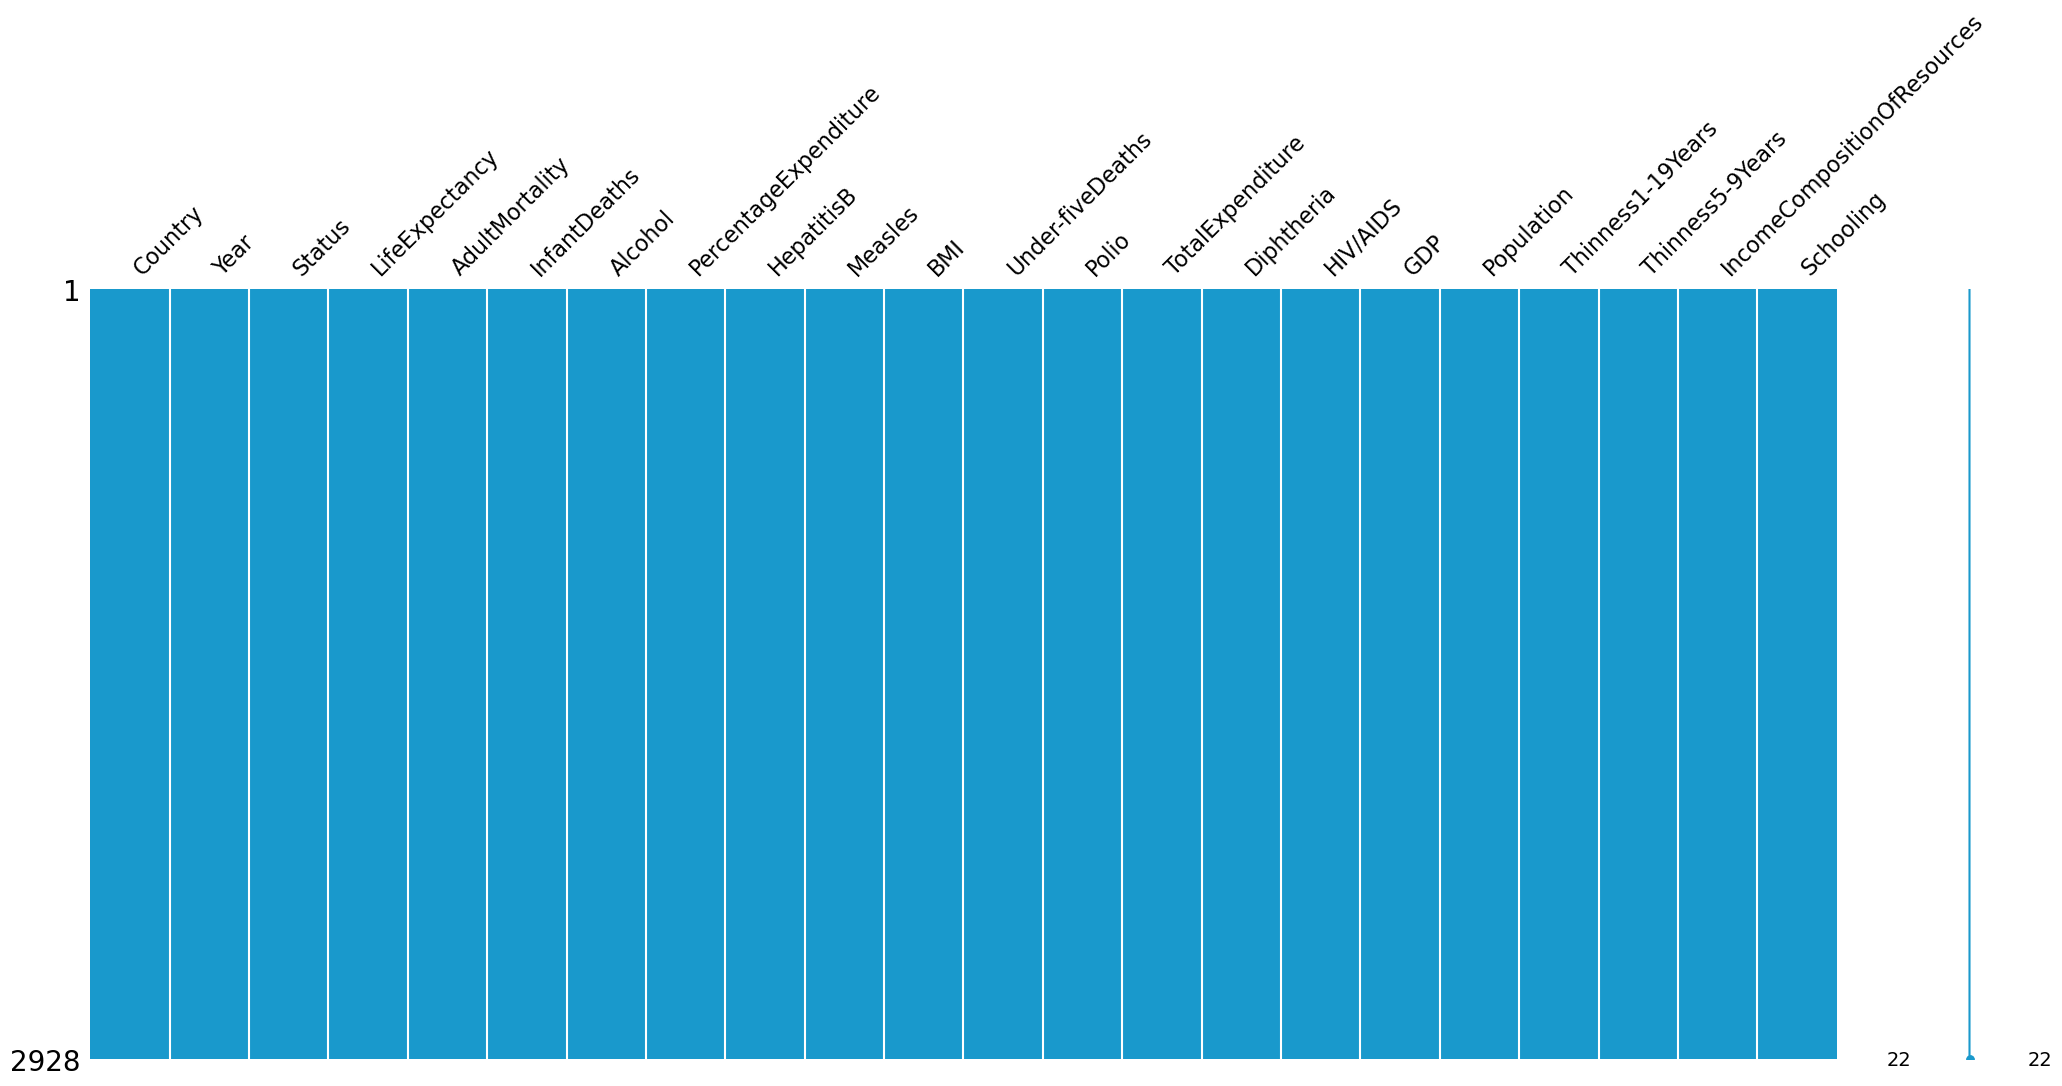

In [18]:
# 결측값 확인 시각화
msno.matrix(df, color=(0.1, 0.6, 0.8))

In [19]:
type(df)

pandas.core.frame.DataFrame

/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_3180/387619524.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/q1/sb69d6d1089fv5h3fyyt7h_c0000gn/T/ipykernel_3180/387619524.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greens")


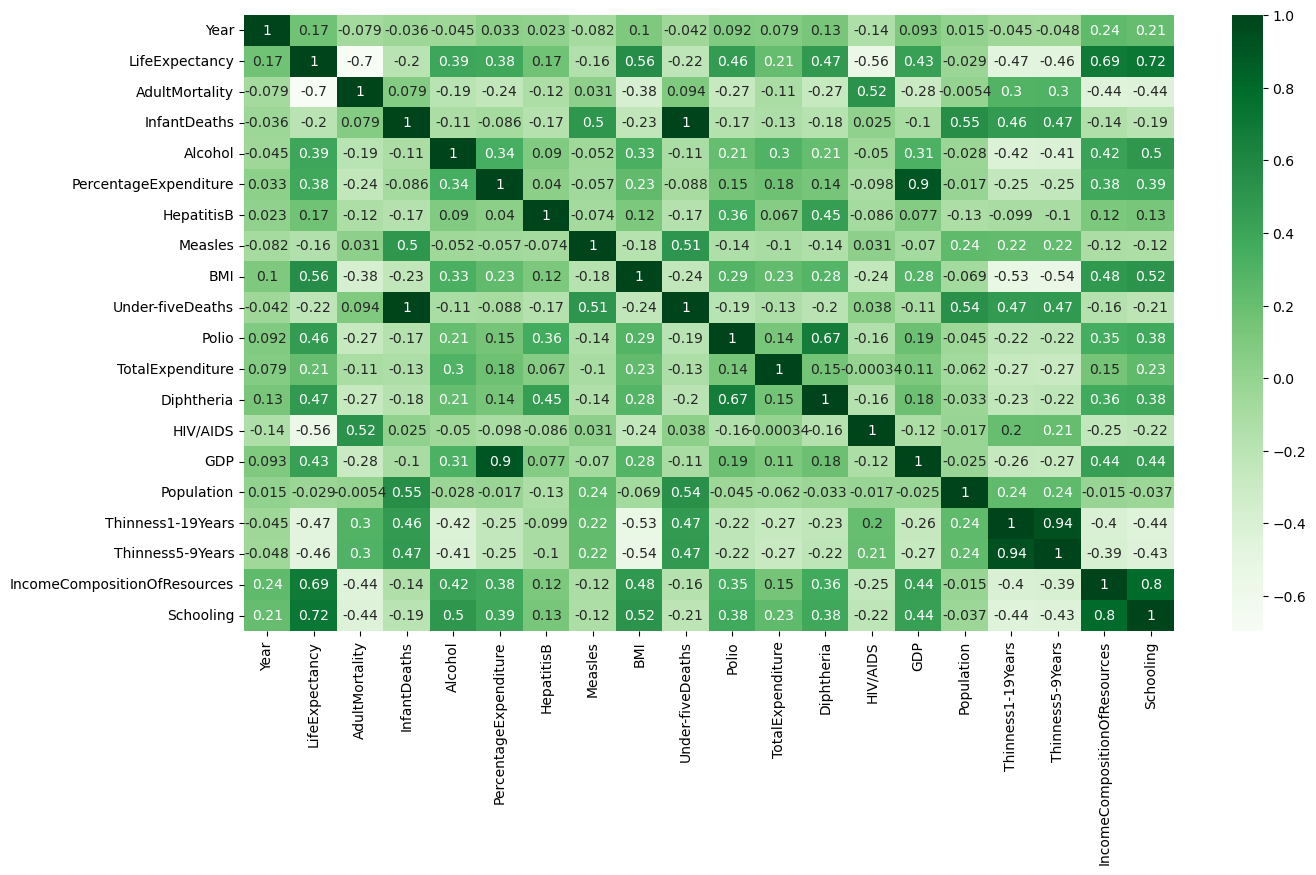

In [20]:
# 상관관계 확인( 히트맵 작성 )
df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()                                  
#0.7 이상인 값 지우기
#0.7 이상인 값:under-fiveDeaths,percentageExpenditure,IncomeCompositionOfResources,Thinness5-9years

In [21]:
# 상관관계 0.7이상인 값 
colss =['Status','AdultMortality','HIV/AIDS','Thinness1-19Years','Under-fiveDeaths','PercentageExpenditure','IncomeCompositionOfResources','Thinness5-9Years']

In [22]:
# 제거
for col in colss:
    df=df.drop(col,axis=1)

<Axes: >

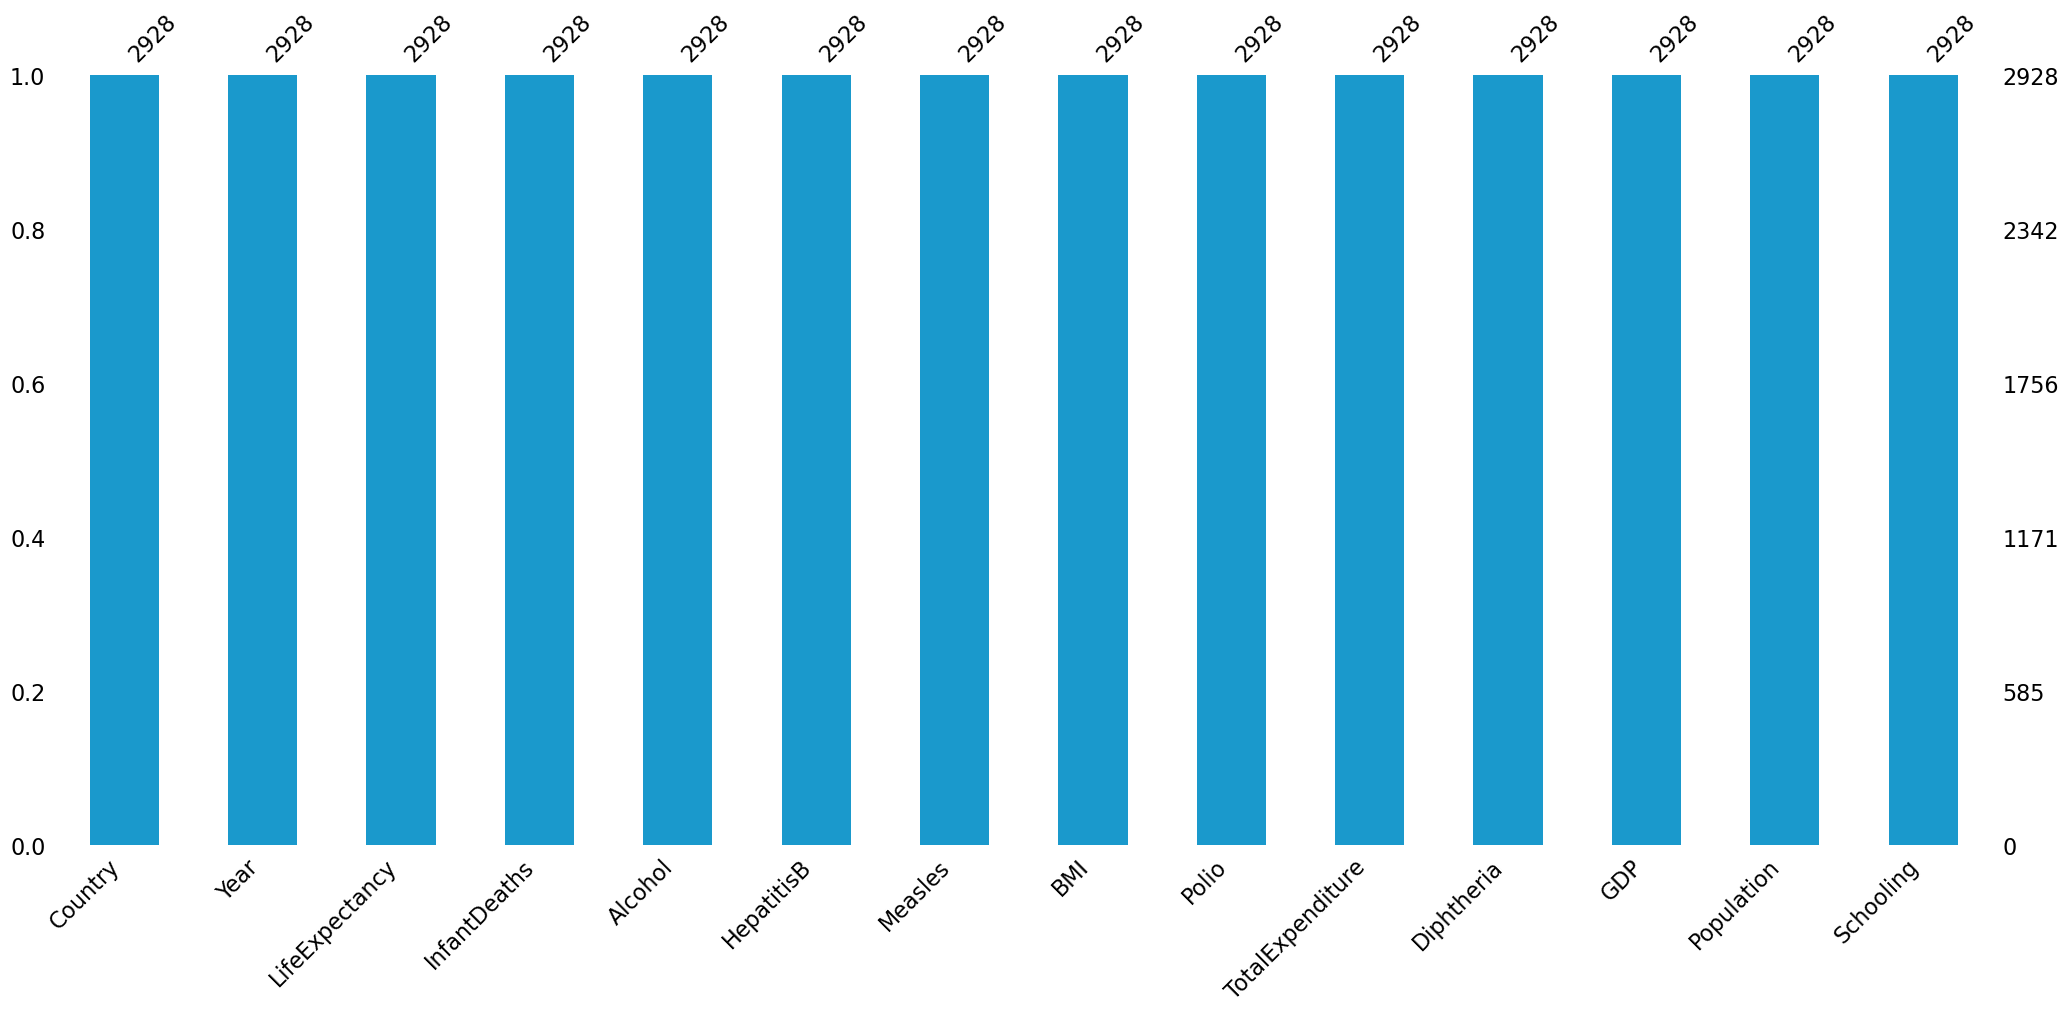

In [23]:
# 제거 확인
import missingno as msno
msno.bar(df, color=(0.1, 0.6, 0.8))

In [24]:
df.shape

(2928, 14)

In [25]:
# 2011~2015 test 데이터로 설정
years = [2011,2012, 2013, 2014, 2015]
test = df[df['Year'].isin(years)]
test

,Country,Year,LifeExpectancy,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,GDP,Population,Schooling
0,Afghanistan,2015,65.0,62,0.010000,65.0,1154,19.1,6.0,8.160000,65.0,584.259210,33736494.0,10.1
1,Afghanistan,2014,59.9,64,0.010000,62.0,492,18.6,58.0,8.180000,62.0,612.696514,327582.0,10.0
2,Afghanistan,2013,59.9,66,0.010000,64.0,430,18.1,62.0,8.130000,64.0,631.744976,31731688.0,9.9
3,Afghanistan,2012,59.5,69,0.010000,67.0,2787,17.6,67.0,8.520000,67.0,669.959000,3696958.0,9.8
4,Afghanistan,2011,59.2,71,0.010000,68.0,3013,17.2,68.0,7.870000,68.0,63.537231,2978599.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,67.0,22,4.614856,87.0,0,31.8,88.0,5.930163,87.0,118.693830,15777451.0,10.3
2923,Zimbabwe,2014,59.2,23,6.500000,91.0,0,31.3,92.0,6.440000,91.0,127.474620,15411675.0,10.3
2924,Zimbabwe,2013,58.0,25,6.390000,95.0,0,3.8,95.0,6.880000,95.0,111.227396,155456.0,10.4
2925,Zimbabwe,2012,56.6,26,6.090000,97.0,0,3.3,95.0,6.690000,95.0,955.648466,1471826.0,9.8


In [26]:
# test 데이터 갯수 확인
test.shape

(915, 14)

In [27]:
# 2011~2015년을 제외한 나머지 데이터 train으로 설정
years_to_exclude = [2011,2012, 2013, 2014, 2015]
train = df[~df['Year'].isin(years_to_exclude)]
train

,Country,Year,LifeExpectancy,InfantDeaths,Alcohol,HepatitisB,Measles,BMI,Polio,TotalExpenditure,Diphtheria,GDP,Population,Schooling
5,Afghanistan,2010,58.8,74,0.01,66.0,1989,16.7,66.0,9.20,66.0,553.328940,2883167.0,9.2
6,Afghanistan,2009,58.6,77,0.01,63.0,2861,16.2,63.0,9.42,63.0,445.893298,284331.0,8.9
7,Afghanistan,2008,58.1,80,0.03,64.0,1599,15.7,64.0,8.33,64.0,373.361116,2729431.0,8.7
8,Afghanistan,2007,57.5,82,0.02,63.0,1141,15.2,63.0,6.73,63.0,369.835796,26616792.0,8.4
9,Afghanistan,2006,57.3,84,0.03,64.0,1990,14.7,58.0,7.43,58.0,272.563770,2589345.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,27,4.36,68.0,31,27.1,67.0,7.13,65.0,454.366654,12777511.0,9.2
2934,Zimbabwe,2003,44.5,26,4.06,7.0,998,26.7,7.0,6.52,68.0,453.351155,12633897.0,9.5
2935,Zimbabwe,2002,44.8,25,4.43,73.0,304,26.3,73.0,6.53,71.0,57.348340,125525.0,10.0
2936,Zimbabwe,2001,45.3,25,1.72,76.0,529,25.9,76.0,6.16,75.0,548.587312,12366165.0,9.8


In [28]:
# train 데이터 갯수확인
train.shape

(2013, 14)

<Axes: >

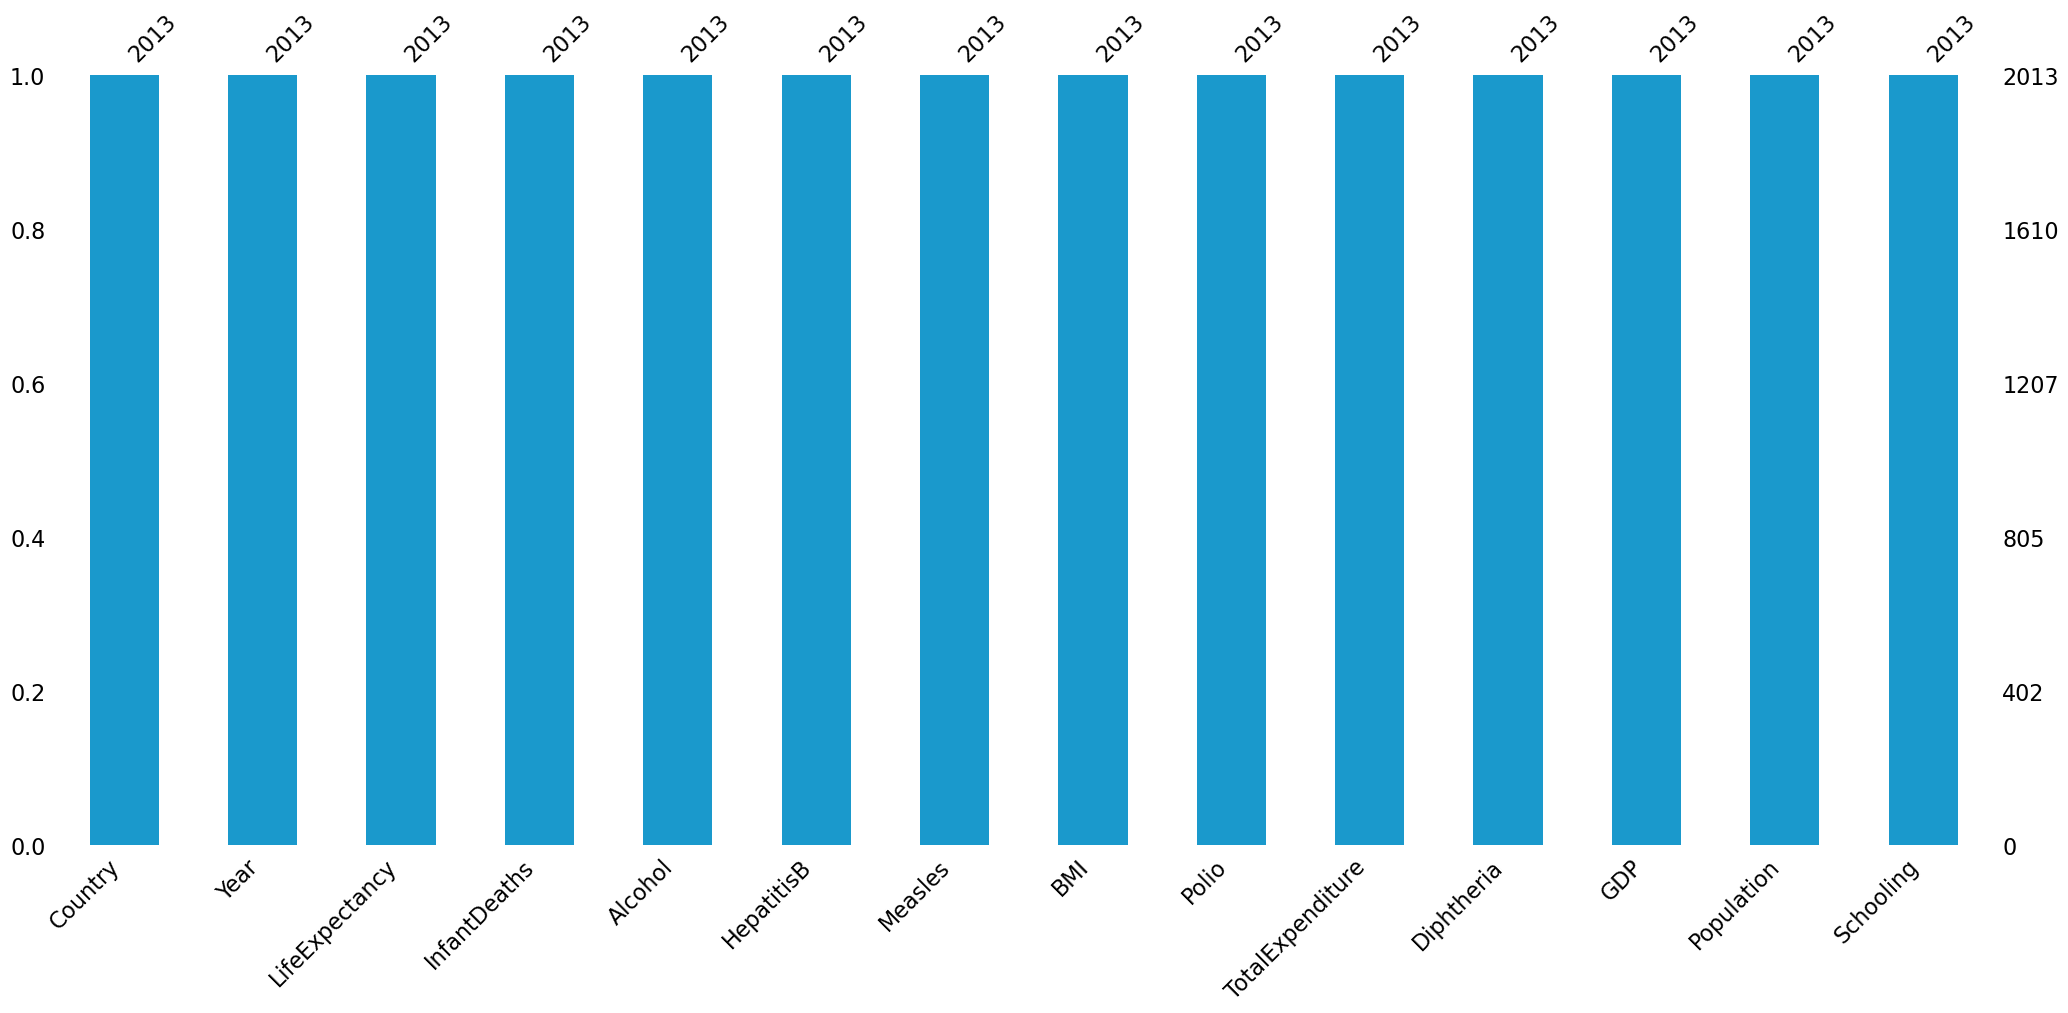

In [29]:
# train 데이터 나누어졌는지 시각화
msno.bar(train, color=(0.1, 0.6, 0.8))

<Axes: >

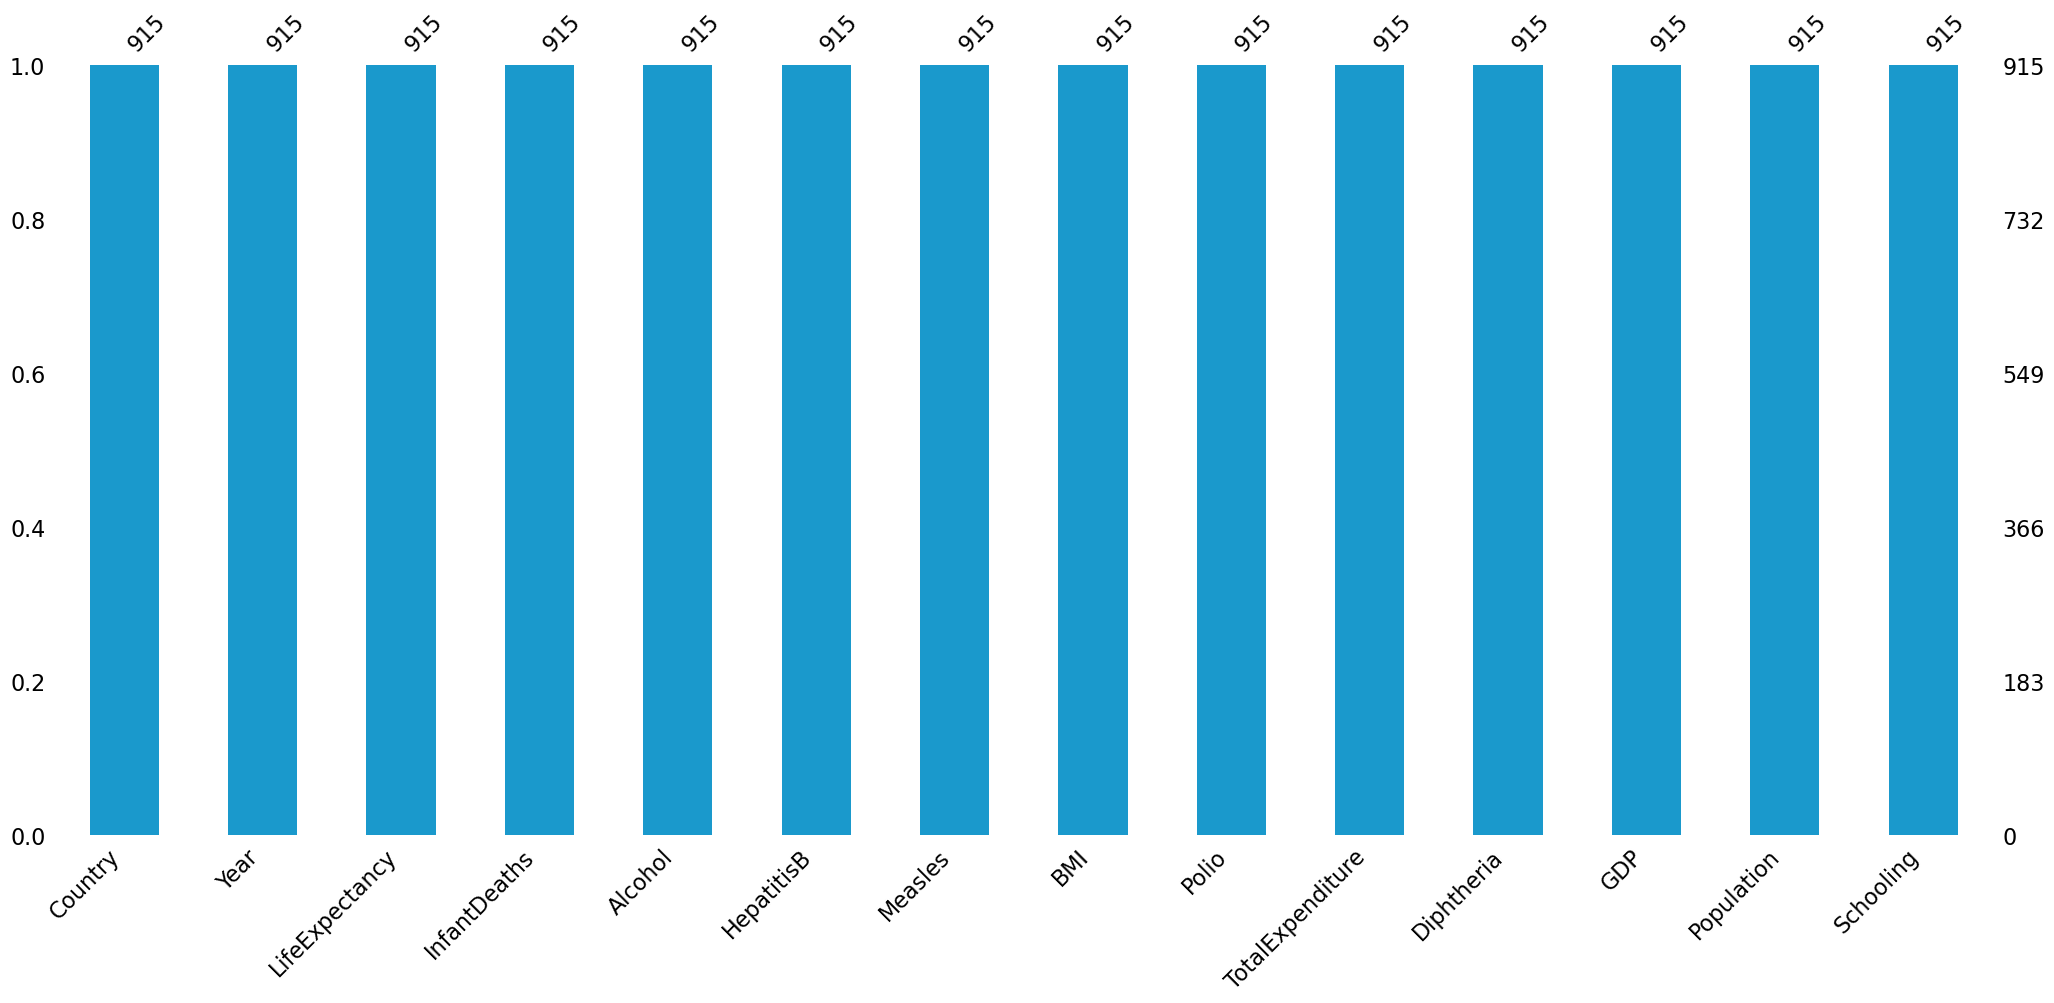

In [30]:
# test 데이터 분리 시각화 확인
msno.bar(test, color=(0.1, 0.6, 0.8))

In [31]:
# train, test 데이터를 X,y 분류
X_train= train.drop("LifeExpectancy",axis=1)
y_train= train['LifeExpectancy']
X_test= test.drop("LifeExpectancy",axis=1)
y_test= test['LifeExpectancy']

In [32]:
# 나눠졌는지 확인
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2013, 13), (915, 13), (2013,), (915,))

## 스케일링

In [33]:
df.columns

Index(['Country', 'Year', 'LifeExpectancy', 'InfantDeaths', 'Alcohol',
       'HepatitisB', 'Measles', 'BMI', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'GDP', 'Population', 'Schooling'],
      dtype='object')

In [34]:
# num_cols : 숫자형 데이터, cat_cols: 문자형 데이터
# 따로 스케일링
num_cols=['Year',
       'InfantDeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'GDP', 'Population',
        'Schooling']
cat_cols=['Country']

In [35]:
# 문자형 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(sparse_output=False)
X_train_cat=oe.fit_transform(X_train[cat_cols])
X_test_cat = oe.fit_transform(X_test[cat_cols])
X_train_cat.shape, X_test_cat.shape

((2013, 183), (915, 183))

In [36]:
# 숫자형 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train_num=ss.fit_transform(X_train[num_cols])
X_test_num = ss.fit_transform(X_test[num_cols])
X_train_num.shape, X_test_num.shape

((2013, 12), (915, 12))

In [37]:
# 스케일링된 데이터 conatenate로 결합
X_train_s=np.concatenate((X_train_cat,X_train_num),axis=1)
X_test_s = np.concatenate((X_test_cat,X_test_num), axis=1)
X_train_s.shape, X_test_s.shape

((2013, 195), (915, 195))

In [38]:
# 결합됐는지 체크
pd.DataFrame(X_train_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Columns: 195 entries, 0 to 194
dtypes: float64(195)
memory usage: 3.0 MB


In [39]:
# 결합됐는지 체크
pd.DataFrame(X_test_s).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Columns: 195 entries, 0 to 194
dtypes: float64(195)
memory usage: 1.4 MB


In [40]:
# np.array로 변환
y_train=y_train.values
y_test=y_test.values

In [41]:
# 갯수체크
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2013 non-null   float64
dtypes: float64(1)
memory usage: 15.9 KB


In [42]:
# np.array 변환 체크
type(X_train_s),type(y_train)

(numpy.ndarray, numpy.ndarray)

## 학습

- LinearRegression,RandomForestRegressor,SVR


##### LinearRegression

In [43]:
# 선형회귀 알고리즘을 이용하여 모델 성능 테스트
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train_s,y_train)

In [44]:
w = model.coef_ # 가중치
w[:5]

array([-2.51743475e+11, -2.51743475e+11, -2.51743475e+11, -2.51743475e+11,
       -2.51743475e+11])

In [45]:
b = model.intercept_ # 절편
b

251743475357.47485

In [46]:
print(f'w = {w}, b = {b}')

w = [-2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11 -2.51743475e+11
 -2.51743475e+11 -2.5

In [47]:
# 예측값이랑 실제값 비교를 위해 예측
pred = model.predict(X_test_s)
y_test.shape, pred.shape

((915,), (915,))

In [48]:
# 랜덤포레스트회귀 모델을 이용하여 학습
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
r = rfr.fit(X_train_s, y_train)

In [49]:
# 예측값이랑 실제값 비교를 위해 예측
y_pred = r.predict(X_test_s)

In [50]:
# feature 갯수 확인
X_test_s.shape, X_train_s.shape

((915, 195), (2013, 195))

In [51]:
# Support Vetor Regression 모델을 이용하여 학습
from sklearn.svm import SVR

svr = SVR()
a = svr.fit(X_train_s, y_train)
preds = svr.predict(X_test_s)

In [52]:
# LinearRegression 이용하여 학습한 모델의 성능 확인
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

# mse: 평균제곱오차, rmse: 평균제곱근오차, mae: 평균절댓값오차
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mae)

MSE: 16.983793895652628
RMSE: 4.121139878195428
MAE: 3.119473816918545


In [53]:
# RandomForestTree 이용하여 학습한 모델의 성능 확인
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# mse: 평균제곱오차, rmse: 평균제곱근오차, mae: 평균절댓값오차
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mae)

MSE: 22.366854092896165
RMSE: 4.7293608545866075
MAE: 3.4675792349726793


In [54]:
# SVR score 이용하여 학습한 모델의 성능 확인
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

# mse: 평균제곱오차, rmse: 평균제곱근오차, mae: 평균절댓값오차
print('MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('MAE:', mae)

MSE: 22.557426607723574
RMSE: 4.749465928683305
MAE: 3.6076126325964464


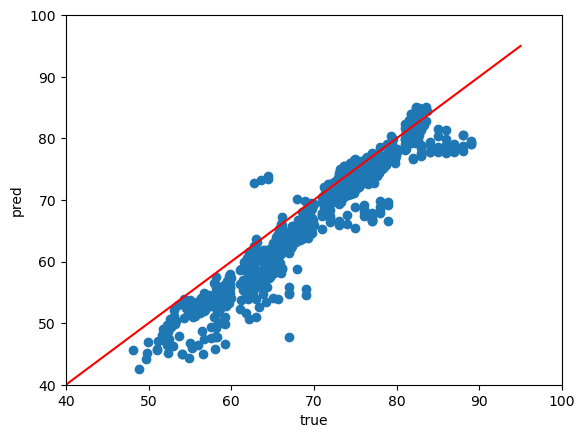

In [55]:
# LinearRegression 모델을 이용하여 학습한 결과 시각화

#
plt.scatter(x=y_test, y=pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(40,100)
plt.ylim(40,100)
plt.plot([40, 95], [40, 95], color='red')
plt.show()

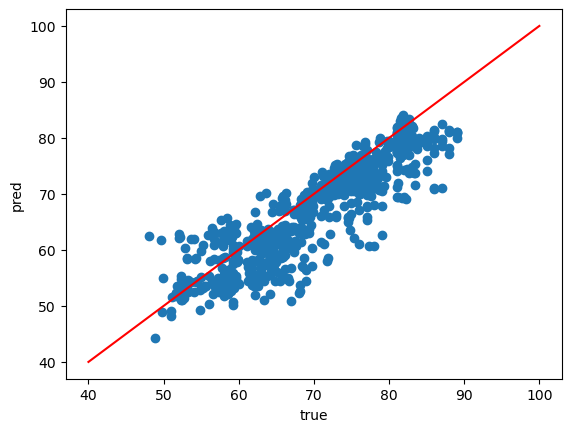

In [56]:
# RandomForestRegressor 모델을 이용하여 학습한 결과 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.plot([40, 100], [40, 100], color='red')
plt.show()

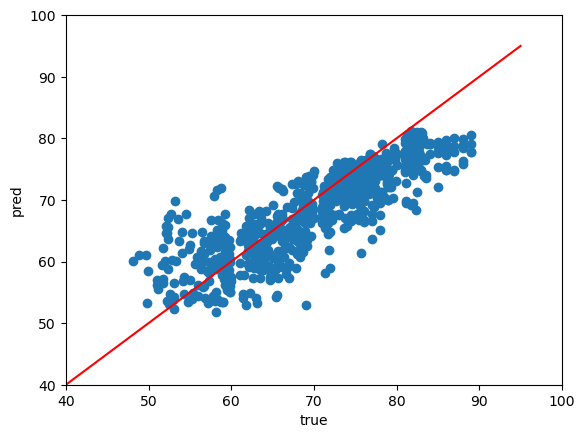

In [57]:
# SVR 모델을 이용하여 학습한 결과 시각화
plt.scatter(y_test, preds)
plt.xlabel('true')
plt.ylabel('pred')
plt.xlim(40, 100)
plt.ylim(40, 100)
plt.plot([40, 95], [40, 95], color='red')
plt.show()

END

## 1. 컬럼인식 문제
- df[columns] 명령어를 실행하였지만, 실행되지 않고 키에러가 뜨는 컬럼들 발견
- 원인확인결과 각 컬럼마다 앞뒤 공백이 제각각 달라 발생한 문제였음
- df.columns를 실행하여 공백을 잘 확인하여야 한다고 판단함

## 2. 데이터 분할에서 겪은 문제
- 2013~15년까지 test 데이터로 사용할 생각이었으나 
- train 데이터수가 많아서 과적합이 발생하여 test 데이터 갯수를 2011~15년까지 늘려서 사용
- 이를 통해 문제 해결

## 3. 학습시 전처리에서 겪은 문제
- 전처리 이후 feature 갯수차이로 인해 정확한 학습이 되지 않음
- 원인은 원핫인코딩에서 갯수가 달라진걸 확인(X_train_cat, X_test_cat의 feature 갯수가 10개 차이나는 것을 확인)
- 원핫인코딩에 사용되는 Country, Status를 value_counts()해본 결과 Country의 엘리멘트에서 이상치로 추측할 수 있는 문제점 발견(각 나라별 연도가 16개있는데 특수하게 데이터가 한개씩 존재하는 나라가 10개 있어서 그 나라들을 이상치 취급하여 제거함)
- 문제점 해결

## 4. 과적합 해결하는 과정에서 컬럼 수가 많아 발생한 문제
- 데이터를 다시 분할하였으나 여전히 과적합을 겪음
- 컬럼수가 많아 과적합이 발생한다고 의심
- 그래서 히트맵에 나오지 않은 컬럼중 연관성이 높은 컬럼만 남기고 나머지는 삭제함(Status 컬럼 삭제)